In [81]:
import pandas as  pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
df=pd.read_csv("train.csv")

In [83]:
cols = ['LotArea', 'Street','Alley','Utilities','LandSlope','Neighborhood','Condition1','YearBuilt','RoofStyle','Foundation','Heating',
       'CentralAir','Electrical','1stFlrSF','2ndFlrSF','Functional','GarageArea','YrSold','SalePrice']

In [84]:
data = df[cols]

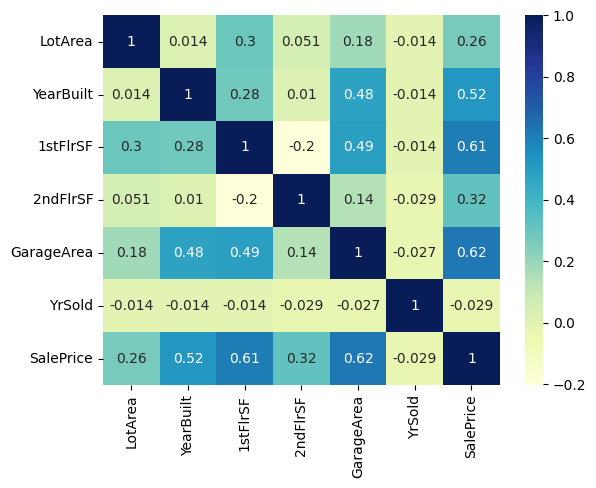

In [85]:
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [86]:
sf = ['LotArea','YearBuilt','1stFlrSF','2ndFlrSF','GarageArea']

In [87]:
x = df[sf]
y = df['SalePrice']

In [88]:
x.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,GarageArea
0,8450,2003,856,854,548
1,9600,1976,1262,0,460
2,11250,2001,920,866,608
3,9550,1915,961,756,642
4,14260,2000,1145,1053,836


In [89]:
x.isnull().sum()

LotArea       0
YearBuilt     0
1stFlrSF      0
2ndFlrSF      0
GarageArea    0
dtype: int64

In [90]:
y.isnull().sum()

0

In [91]:
#sns.lmplot(x="LotArea", y="SalePrice", data=df);

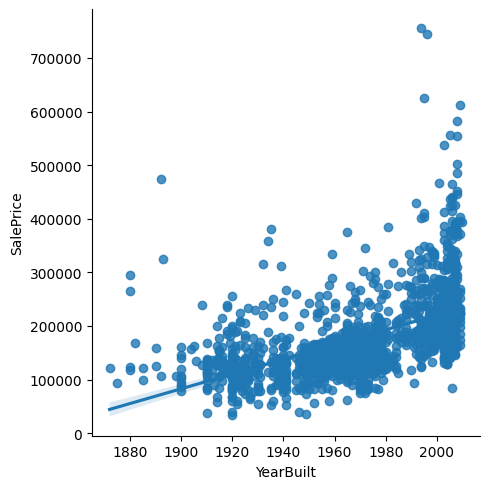

In [92]:
sns.lmplot(x="YearBuilt", y="SalePrice", data=df);

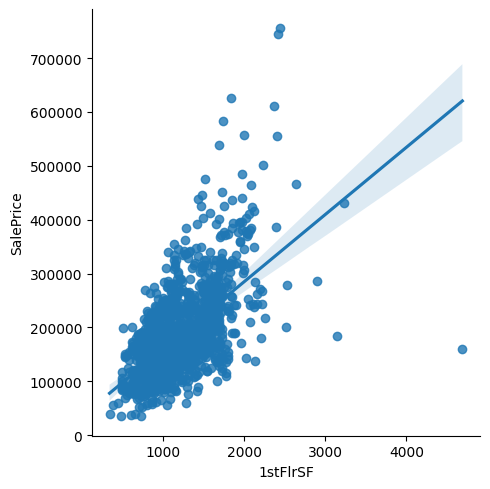

In [93]:
sns.lmplot(x="1stFlrSF", y="SalePrice", data=df);

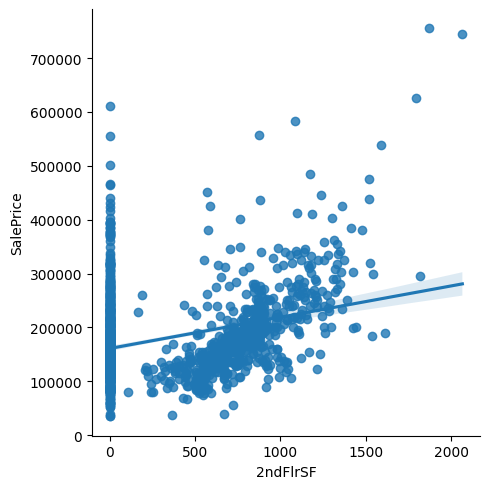

In [94]:
sns.lmplot(x="2ndFlrSF", y="SalePrice", data=df);

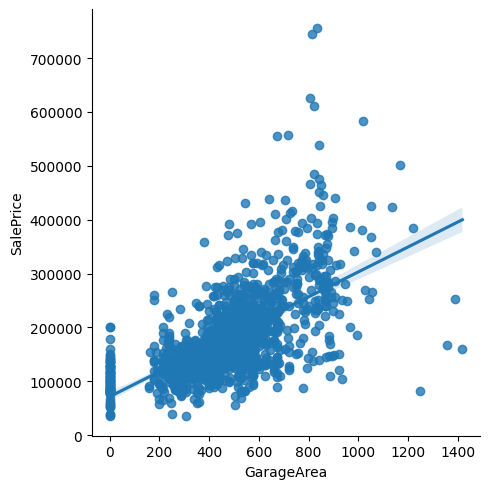

In [95]:
sns.lmplot(x="GarageArea", y="SalePrice", data=df)

In [96]:
# Calculating accuracy of all Regression Models 

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [98]:
y_train

632      82500
208     277000
83      126500
1174    239000
250      76500
         ...  
715     165000
905     128000
1096    127000
235      89500
1061     81000
Name: SalePrice, Length: 1022, dtype: int64

In [99]:
# Multiple Linear Regression

In [100]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [101]:
y_pred = regressor.predict(x_test)

In [102]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7668673994774332

In [103]:
# polynomial Regression 

In [104]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

In [105]:
y_pred_poly = regressor.predict(poly_reg.transform(x_test))

In [106]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_poly)

-49.59965246653583

In [107]:
# Support Vector Regression

In [108]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train)

SVR()

In [109]:
y_pred_svr = regressor.predict(x_test)

In [110]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_svr)

-0.03769825564676732

In [111]:
# Decision Trees Regression 

In [112]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [113]:
y_pred_decision = regressor.predict(x_test)

In [114]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_decision)

0.7278545266174449

In [115]:
# Random Forest Regression 

In [116]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [117]:
y_pred_random = regressor.predict(x_test)

In [118]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_random)

0.8191957026372843

In [119]:
df_test = pd.read_csv('test.csv')

In [120]:
ID=df_test['Id'].values

In [121]:
sft = ['LotArea','YearBuilt','1stFlrSF','2ndFlrSF','GarageArea']

In [122]:
x_new = df_test[sft]

In [123]:
x_new.isnull().sum()

LotArea       0
YearBuilt     0
1stFlrSF      0
2ndFlrSF      0
GarageArea    1
dtype: int64

In [124]:
x_new['GarageArea'] = x_new['GarageArea'].fillna(x_new['GarageArea'].mean())

C:\Users\shwet\AppData\Local\Temp\ipykernel_11464\2286425409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_new['GarageArea'] = x_new['GarageArea'].fillna(x_new['GarageArea'].mean())


In [125]:
x_new.isnull().sum()

LotArea       0
YearBuilt     0
1stFlrSF      0
2ndFlrSF      0
GarageArea    0
dtype: int64

In [126]:
from sklearn.ensemble import RandomForestRegressor
regressor_final = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_final.fit(x, y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [127]:
y_predicted = regressor_final.predict(x_new)

In [128]:
dic={'Id':ID,'SalePrice':y_predicted}
final_df=pd.DataFrame(dic)
final_df

,Id,SalePrice
0,1461,126815.0
1,1462,153290.0
2,1463,181800.0
3,1464,176140.0
4,1465,187860.0
...,...,...
1454,2915,79290.0
1455,2916,90640.0
1456,2917,160453.2
1457,2918,103360.0


In [129]:
final_df.to_csv('final_test.csv',index=False)